In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# TASK 1 : Check out Basic Dataframe Info


In [ ]:
#Checking information of data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


# TASK 2: Clean up Fare, Convert to Float

In [ ]:
#checking data type for various columns
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Removing /$/ and /'/ and checking for the negative value 
df_titanic['Fare'] = df_titanic['Fare'].str.replace('$', '').str.replace(',', '')
df_titanic['Fare'] = df_titanic['Fare'].str.replace('(', '-').str.replace(')', '')

# Converting fare datatype to float
df_titanic['Fare'] = df_titanic['Fare'].astype(float)

In [ ]:
#Rechecking if datatype for fare has been converted to float
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# TASK 3: Check out statistics of Numeric Columns

In [ ]:
#Checking summary statistics for the data
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


SibSp: The mean number of siblings or spouses aboard the Titanic is approximately 0.52, with some passengers having up to 8 siblings or spouses.
Parch: The mean number of parents or children aboard the Titanic is approximately 0.38, with some passengers having up to 6 parents or children.
Fare: The mean fare paid by passengers is approximately $32.20, with a wide range of fares from $0 to a maximum of $512.33.
Age: The average age of passengers aboard was 29 and half years with the youngest being about 4 months old and the eldest being 80 years.
Mean Survived: This gives an information on the average number of people who survived the sinking sink. From our summary statistics we can tell that 38% of the passengers survived.

# TASK 4: Plot bar chart for Perished vs. Survived

In [ ]:
# Group the data by the "Survived" column 
#Finding the number of perished (0) and survived (1)

ppl_survived  = df_titanic['Survived'].value_counts()
ppl_survived




Survived
0    549
1    342
Name: count, dtype: int64

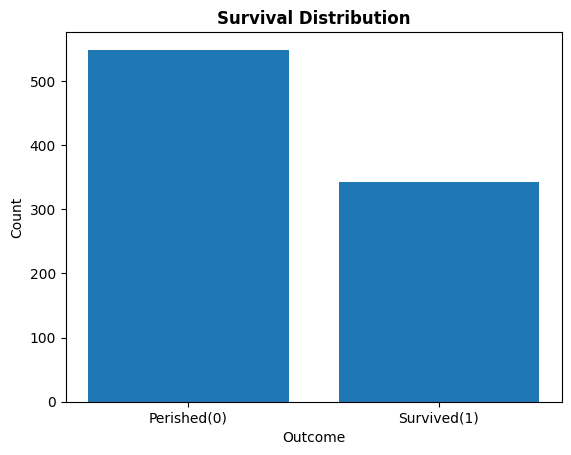

In [ ]:
#Plotting a Bar chart for survived column (Perished vs Survived)

# Define labels for the bars&Plot the bar chart
labels = ['Perished(0)', 'Survived(1)']
plt.bar(labels, ppl_survived)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Survival Distribution', fontweight='bold')

# Show the plot
plt.show()

# TASK 5: Plot Bar Chart on Number of Male and Femal Passengers

In [ ]:
# COUNTING GENDER
gender_survived = df_titanic['Sex'].value_counts()
print(gender_survived)

Sex
male      577
female    314
Name: count, dtype: int64


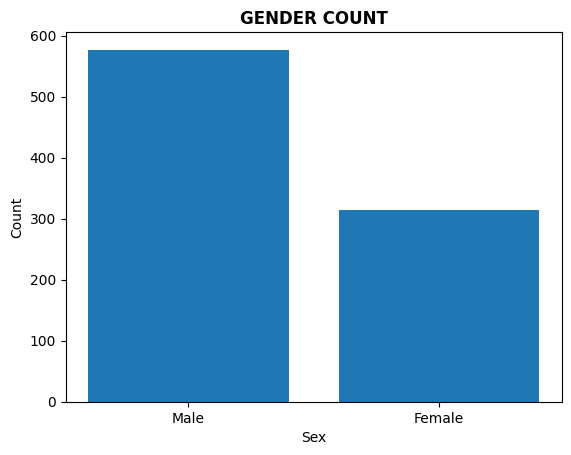

In [ ]:
#Plotting a bar chart on the number of Male and Female pasengers.

labels = ['Male', 'Female']
plt.bar(labels, gender_survived)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('GENDER COUNT',fontweight='bold')

# Show the plot
plt.show()

# TASK 6: Groupby Sex to Find Survival Rate of Male and Female

In [ ]:
# Group the data by the "Sex" column and calculate the survival rate for each group
survival_rate = df_titanic.groupby('Sex')['Survived'].mean()
print(survival_rate)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


# TASK 7:  Plot Perished vs. Survived Bar for Male and Female

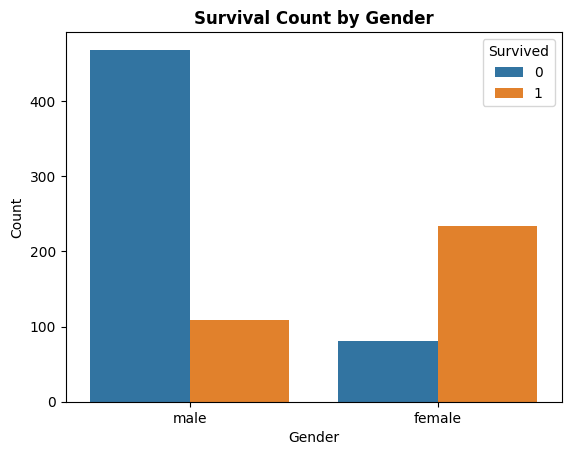

In [ ]:
#countplot with 'Sex' on the x-axis and 'Survived' as hue
sns.countplot(data=df_titanic, x='Sex', hue='Survived')

labels = ['Male', 'Female']

#Adding labels and titles
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender', fontweight='bold')

# Show the plot
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

# TASK 8: List survival rate of each Pclass 

In [ ]:
# Group the data by "Pclass" 
survival_pclass = df_titanic.groupby('Pclass')['Survived'].mean()

# Display the survival rates for each passenger class
print(survival_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


# TASK 9: Plot Perished vs. Survived for each Pclass

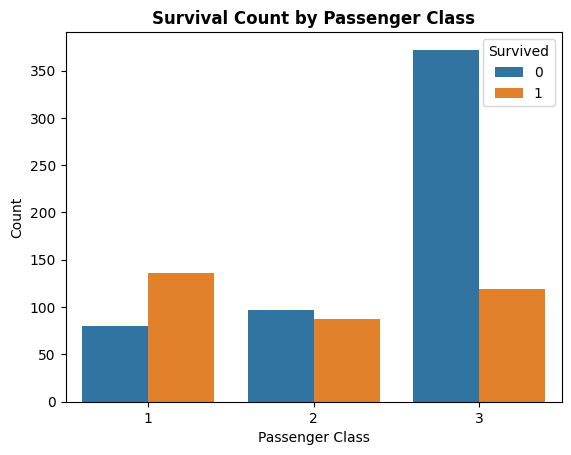

In [ ]:
#countplot with 'Pclass' on the x-axis and 'Survived' as hue
sns.countplot(data=df_titanic, x='Pclass', hue='Survived')

# Set labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class', fontweight='bold')

# Show the plot
plt.show()

Task 10: Plot histogram for Age

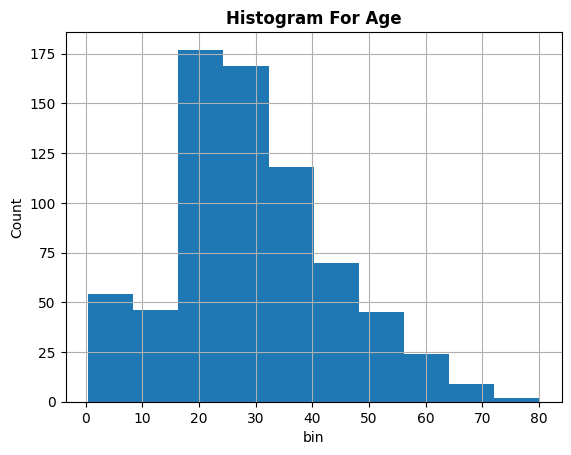

In [ ]:
#Plotting histogram using pandas series hist() to take care of missing values
df_titanic.hist('Age')

#Defining lables and titles
plt.xlabel('bin')
plt.ylabel('Count')
plt.title('Histogram For Age', fontweight='bold')

#Show Plot
plt.show()

Task11: Stack age histogram of survived on top of overall age histogram

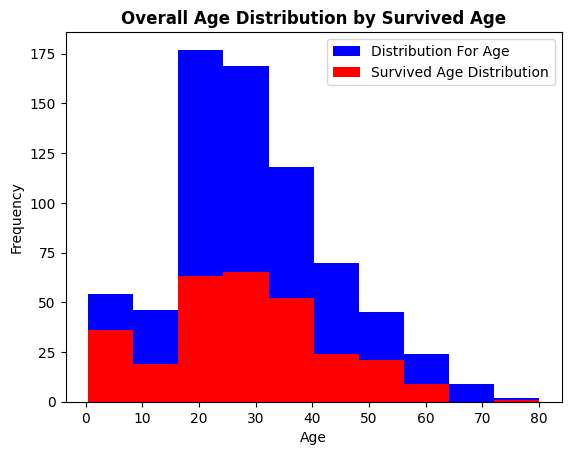

In [ ]:
#Plotting histogram for age
plt.hist(df_titanic['Age'], bins=10, label='Distribution For Age', color='blue')

# Filtering agaes of survived passengers
survived_passengers_by_age = df_titanic[df_titanic['Survived'] == 1]['Age']

# Ploting survived age histogram on the same axis
plt.hist(survived_passengers_by_age, bins=10, color='red', label='Survived Age Distribution')

# Defining labels and titles
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Overall Age Distribution by Survived Age', fontweight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()